In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from konlpy.tag import Twitter, Kkma, Mecab, Hannanum
t = Twitter()
kkma = Kkma()
#mecab = Mecab() # mecab은 윈도우에서 사용 불가
hannanum = Hannanum()

from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
#한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [140]:
data=pd.read_csv('master_wordcloud.csv')
data

Unnamed: 0         GameName  \
0                 0        리그 오브 레전드   
1                 1        리그 오브 레전드   
2                 2        리그 오브 레전드   
3                 3        리그 오브 레전드   
4                 4        리그 오브 레전드   
...             ...              ...   
9878546     9878546  콜 오브 듀티: 모던 워페어   
9878547     9878547  콜 오브 듀티: 모던 워페어   
9878548     9878548  콜 오브 듀티: 모던 워페어   
9878549     9878549  콜 오브 듀티: 모던 워페어   
9878550     9878550  콜 오브 듀티: 모던 워페어   

                                                  FullText  
0                          갈수록 웃기고 퀄리티도 계속 높아지네 존잼          
1                           얘가 솔직히 진짜 매력있는 캐릭턴데 고인          
2                역시 빛돌 빅 무리수 조쿠요 이런 쉰선한 바람이 에 필요하다          
3                                  갈수록 꿀잼  퀄도 높아지고          
4                              역시 김정균 킨드레드템트리를 맞추네          
...                                                    ...  
9878546          벙어리 체험 게임입니다 이 시대에 착취 되지 않을려면 의견제시는 필수입니다  
9878547                              말이 필요없음 재밋었 멀티에 핑만 빼고  
9878548                              콜옵계의 가장 명작이라면 이것이 아닐까  
9878549          내 인생을 바꾼 최고의 게임이다 콜 오브 듀티 시리즈 중 가장 뛰어나...  
9878550          전설의 시작 개발회사 인피니티와드의 비극이 시작된 지점이기도 하다 시...  

[9878551 rows x 3 columns]

In [141]:
data = data.drop('Unnamed: 0', axis=1)
data['text'] = data['FullText']

In [142]:
text = str(data['text'])

from collections import Counter
counter = Counter(text)

print(counter.most_common(10))
print(len(text))

[(' ', 408), ('8', 13), ('\n', 11), ('이', 10), ('.', 9), ('시', 8), ('5', 8), ('9', 7), ('7', 7), ('고', 5)]
713


In [143]:
counter = Counter(data['text'])

print(counter.most_common(10))
print(len(data['text']))

[('    블라인드 된 코멘트입니다 내용보기    ', 1121), ('    감사합니다    ', 999), ('세븐나이츠 이벤트 참여 닉네임        ', 183), ('              ', 153), ('가슴이 웅장해진다        ', 132), ('감사합니다        ', 112), ('    정보 감사합니다    ', 105), ('             ', 101), ('안녕하세요        ', 89), ('                ', 81)]
9878551


In [144]:
text_kkma = kkma.sentences(text)
print(len(text_kkma))
text_kkma[:1]

4


['0 갈수록 웃기고 퀄리티도 계속 높아 지네 존 잼 1 얘가 솔직히 진짜 매력 있는 캐릭 턴데 고인 2 역시 빛 돌 빅 무리수 조쿠요 이런 쉰 선한 바람이에 필요 하다 3 갈수록 꿀 잼 퀄도 높아 지고 4 역시 김정 균 킨 드레드 템 트리를 맞추네 ...']

In [7]:
text_kkma = kkma.pos(text)
print(len(text_kkma))
text_kkma[:10]

170


[('0', 'NR'),
 ('가', 'VV'),
 ('ㄹ수록', 'ECD'),
 ('웃기', 'VV'),
 ('고', 'ECE'),
 ('퀄리티', 'NNG'),
 ('도', 'JX'),
 ('계속', 'MAG'),
 ('높', 'VA'),
 ('아', 'ECD')]

In [8]:
text_han = hannanum.nouns(text)
print(len(text_han))
text_han[:10]

61


['0', '퀄리티', '존잼', '1', '얘', '진짜', '매력', '캐릭턴데', '고인', '2']

In [9]:
example = data['text'][:1]
example

0    갈수록 웃기고 퀄리티도 계속 높아지네 존잼        
Name: text, dtype: object

In [10]:
example = example[0]
example

'갈수록 웃기고 퀄리티도 계속 높아지네 존잼        '

In [11]:
# 토큰화
example_token = example.split()
example_token[:10]

['갈수록', '웃기고', '퀄리티도', '계속', '높아지네', '존잼']

In [12]:
# 트위터 형태소 분석기로 품사 태깅
example_pos = t.pos(example, norm=True, stem=True)
example_pos[:10]

[('갈수록', 'Noun'),
 ('웃기', 'Noun'),
 ('고', 'Josa'),
 ('퀄리티', 'Noun'),
 ('도', 'Josa'),
 ('계속', 'Noun'),
 ('높아지다', 'Verb'),
 ('존잼', 'Noun')]

In [13]:
import nltk
nltk_text = nltk.Text(example_pos, name='data')

In [14]:
print(len(nltk_text))
print(len(nltk_text.tokens))
print(len(set(nltk_text.tokens)))

8
8
8


In [15]:
nltk_text.vocab().most_common(30)

[(('갈수록', 'Noun'), 1),
 (('웃기', 'Noun'), 1),
 (('고', 'Josa'), 1),
 (('퀄리티', 'Noun'), 1),
 (('도', 'Josa'), 1),
 (('계속', 'Noun'), 1),
 (('높아지다', 'Verb'), 1),
 (('존잼', 'Noun'), 1)]

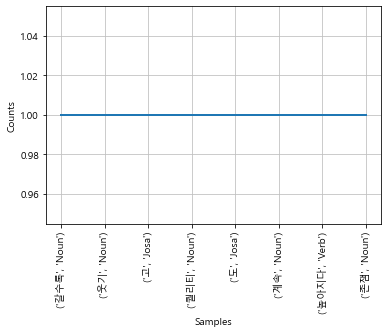

In [16]:
nltk_text.plot(50)

In [221]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = 'C:\\Users\\sh921\\Desktop\\Jalnan.ttf', 
        colormap = 'bone',
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

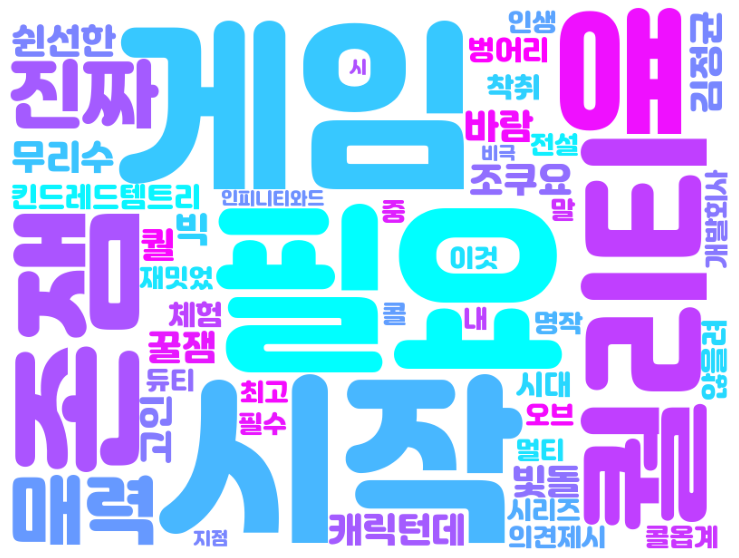

Wall time: 4.33 s


In [165]:
# Paired
# 한나눔으로 추출한 명사만으로 워드클라우드를 그린다.
%time displayWordCloud(' '.join(text_han))

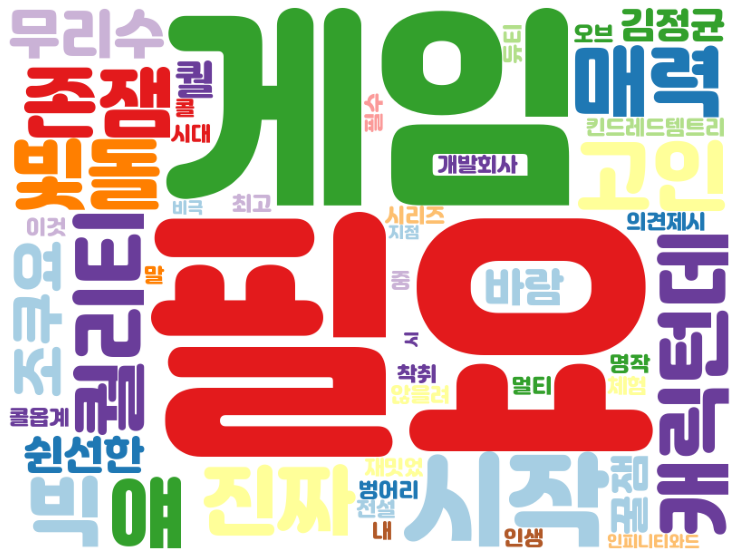

Wall time: 4.97 s


In [152]:
# Paired
# 한나눔으로 추출한 명사만으로 워드클라우드를 그린다.
%time displayWordCloud(' '.join(text_han))

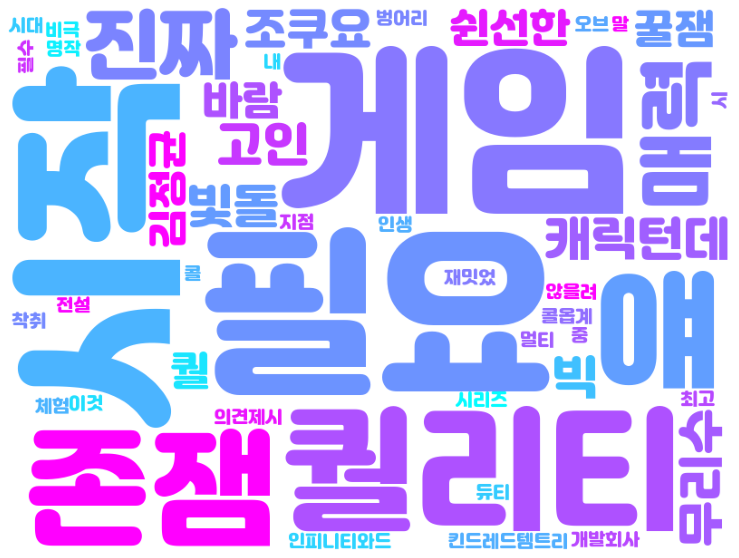

Wall time: 4.83 s


In [133]:
# cool
# 한나눔으로 추출한 명사만으로 워드클라우드를 그린다.
%time displayWordCloud(' '.join(text_han))

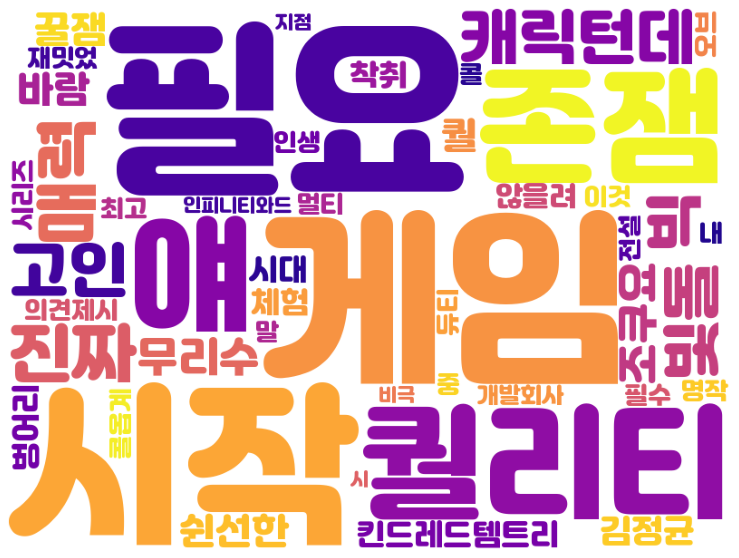

Wall time: 5.88 s


In [94]:
# plasma
# 한나눔으로 추출한 명사만으로 워드클라우드를 그린다.
%time displayWordCloud(' '.join(text_han))

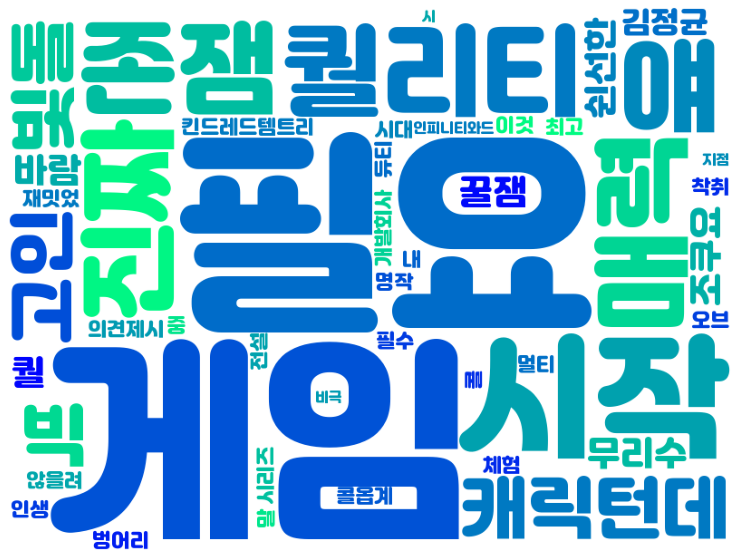

Wall time: 4.47 s


In [88]:
# winter
# 한나눔으로 추출한 명사만으로 워드클라우드를 그린다.
%time displayWordCloud(' '.join(text_han))

In [ ]:
Accent
Accent_r
Blues
Blues_r
BrBG
BrBG_r
BuGn
BuGn_r
BuPu
BuPu_r
CMRmap
CMRmap_r
Dark2
Dark2_r
GnBu
GnBu_r
Greens
Greens_r
Greys
Greys_r
OrRd
OrRd_r
Oranges
Oranges_r
PRGn
PRGn_r
Paired
Paired_r
Pastel1
Pastel1_r
Pastel2
Pastel2_r
PiYG
PiYG_r
PuBu
PuBuGn
PuBuGn_r
PuBu_r
PuOr
PuOr_r
PuRd
PuRd_r
Purples
Purples_r
RdBu
RdBu_r
RdGy
RdGy_r
RdPu
RdPu_r
RdYlBu
RdYlBu_r
RdYlGn
RdYlGn_r
Reds
Reds_r
Set1
Set1_r
Set2
Set2_r
Set3
Set3_r
Spectral
Spectral_r
Wistia
Wistia_r
YlGn
YlGnBu
YlGnBu_r
YlGn_r
YlOrBr
YlOrBr_r
YlOrRd
YlOrRd_r
afmhot
afmhot_r
autumn
autumn_r
binary
binary_r
bone
bone_r
brg
brg_r
bwr
bwr_r
cividis
cividis_r
cool
cool_r
coolwarm
coolwarm_r
copper
copper_r
cubehelix
cubehelix_r
flag
flag_r
gist_earth
gist_earth_r
gist_gray
gist_gray_r
gist_heat
gist_heat_r
gist_ncar
gist_ncar_r
gist_rainbow
gist_rainbow_r
gist_stern
gist_stern_r
gist_yarg
gist_yarg_r
gnuplot
gnuplot2
gnuplot2_r
gnuplot_r
gray
gray_r
hot
hot_r
hsv
hsv_r
inferno
inferno_r
jet
jet_r
magma
magma_r
nipy_spectral
nipy_spectral_r
ocean
ocean_r
pink
pink_r
plasma
plasma_r
prism
prism_r
rainbow
rainbow_r
seismic
seismic_r
spring
spring_r
summer
summer_r
tab10
tab10_r
tab20
tab20_r
tab20b
tab20b_r
tab20c
tab20c_r
terrain
terrain_r
twilight
twilight_r
twilight_shifted
twilight_shifted_r
viridis
viridis_r
winter
winter_r

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = 'C:\\Users\\sh921\\Desktop\\nanum-all\\나눔 글꼴\나눔고딕\\NanumFontSetup_TTF_GOTHIC\\NanumGothicBold.ttf', 
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

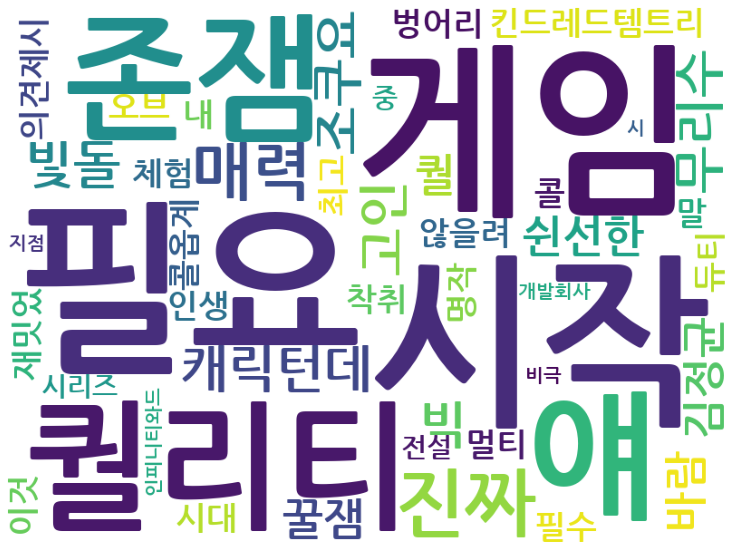

Wall time: 4.06 s


In [18]:
# 한나눔으로 추출한 명사만으로 워드클라우드를 그린다.
%time displayWordCloud(' '.join(text_han))

# 게임별로 워드클라우드 그려보기

In [ ]:
# 게임 리스트 출력
data.groupby(['GameName']).count()

# 롤

In [174]:
game = data[( data.GameName.str.find('리그 오브 레전드') != -1 )]
game.shape

(351435, 3)

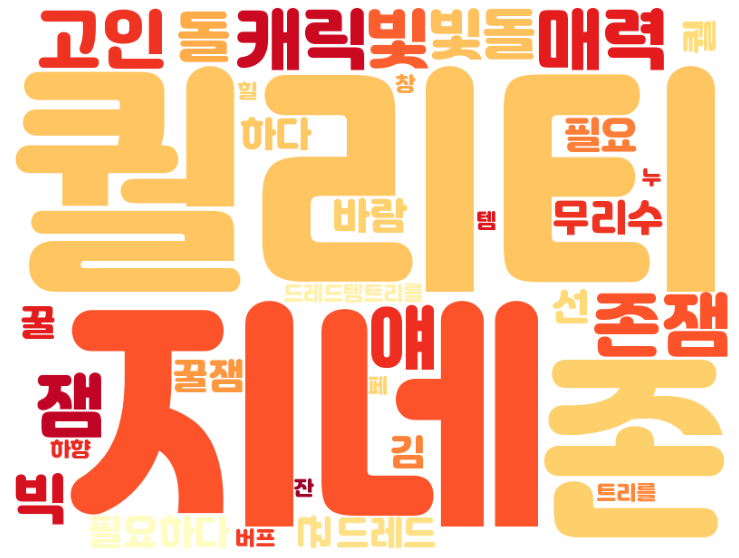

Wall time: 4.33 s


In [192]:
game_kkma = kkma.nouns(str(game.text))
len(game_kkma)
%time displayWordCloud(' '.join(game_kkma))

# 디아블로

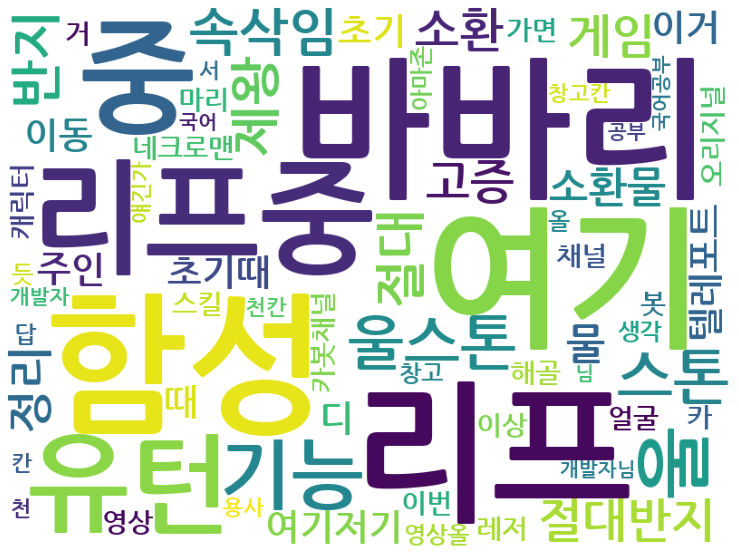

Wall time: 4.21 s


In [23]:
game = data[( data.GameName.str.find('디아블로2: 레저렉션') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# FIFA 온라인 4

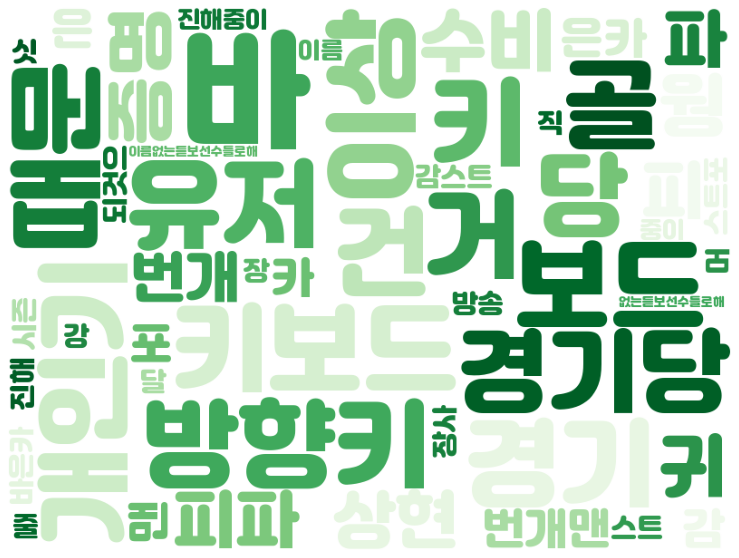

Wall time: 4.09 s


In [145]:
game = data[( data.GameName.str.find('FIFA 온라인 4') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# 오버워치

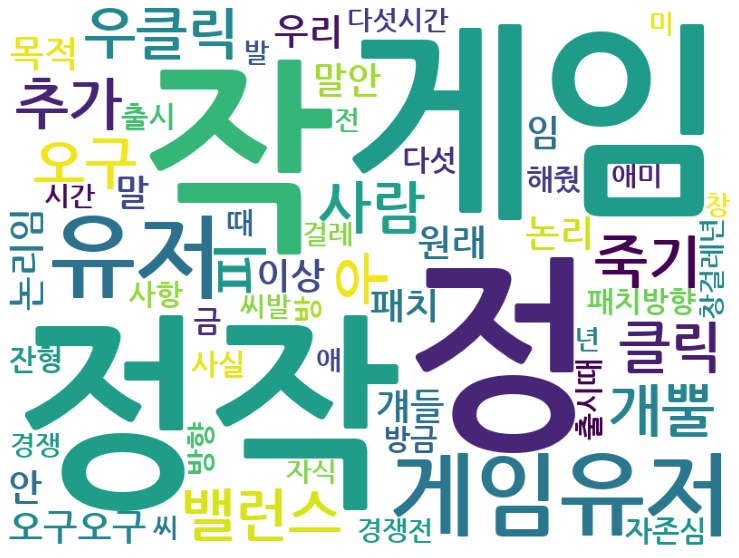

Wall time: 4.33 s


In [25]:
game = data[( data.GameName.str.find('오버워치') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# 로스트아크

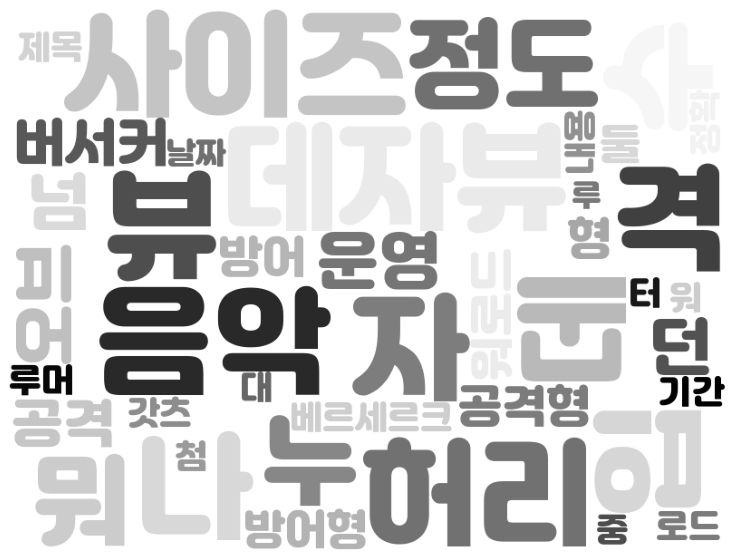

Wall time: 5.48 s


In [194]:
game = data[( data.GameName.str.find('로스트아크') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# 스타크래프트 리마스터

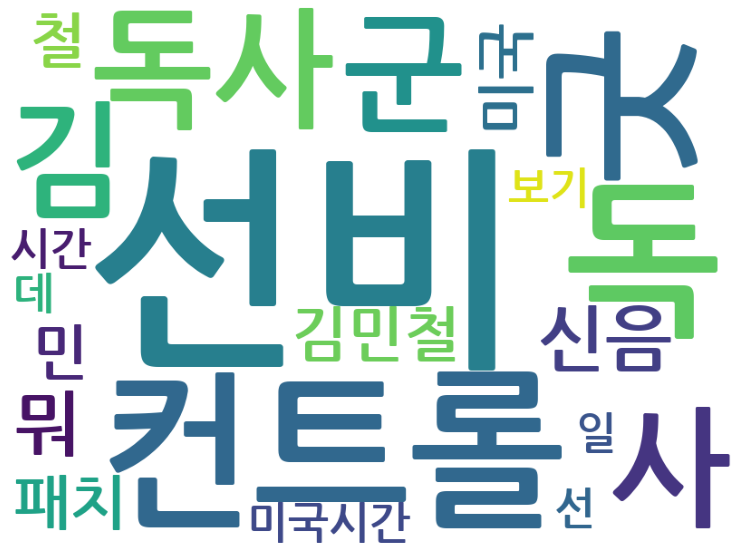

Wall time: 3.38 s


In [27]:
game = data[( data.GameName.str.find('스타크래프트 리마스터') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# 메이플 스토리

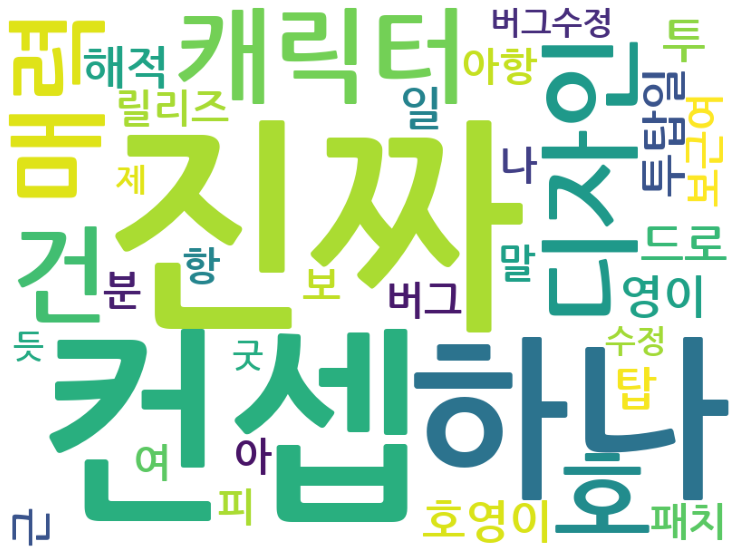

Wall time: 4.1 s


In [28]:
game = data[( data.GameName.str.find('메이플스토리') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# 발로란트

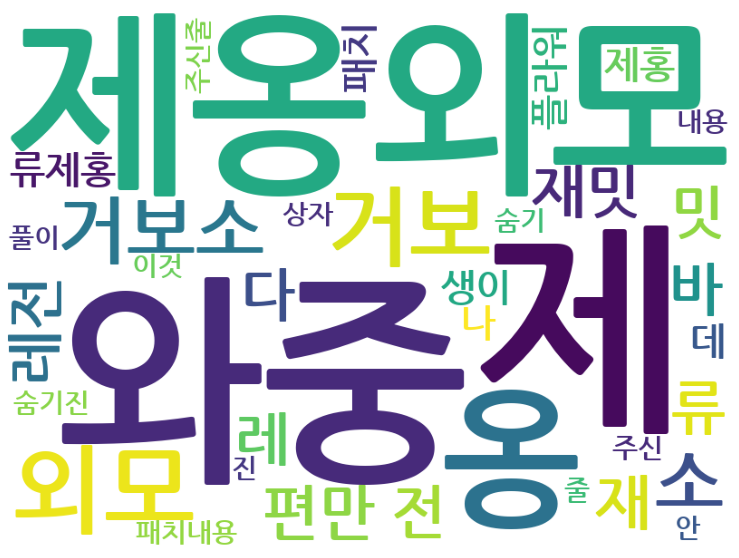

Wall time: 3.53 s


In [29]:
game = data[( data.GameName.str.find('발로란트') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# 던전앤파이터

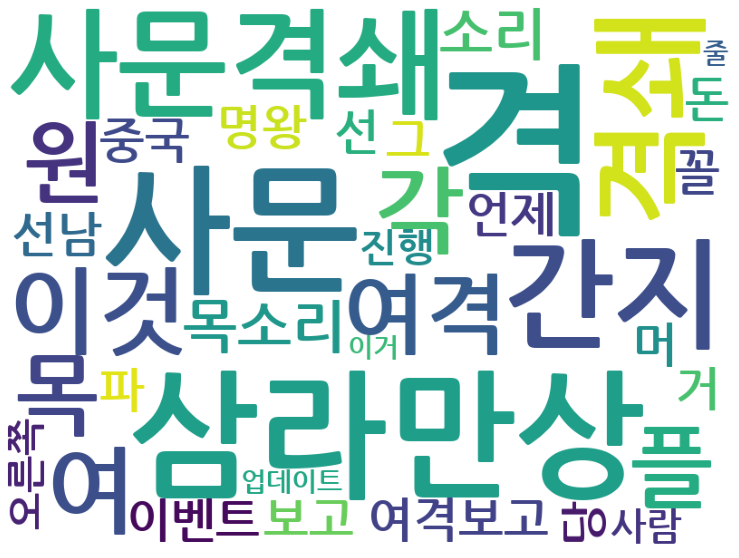

Wall time: 3.23 s


In [30]:
game = data[( data.GameName.str.find('던전앤파이터') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# 리니지2

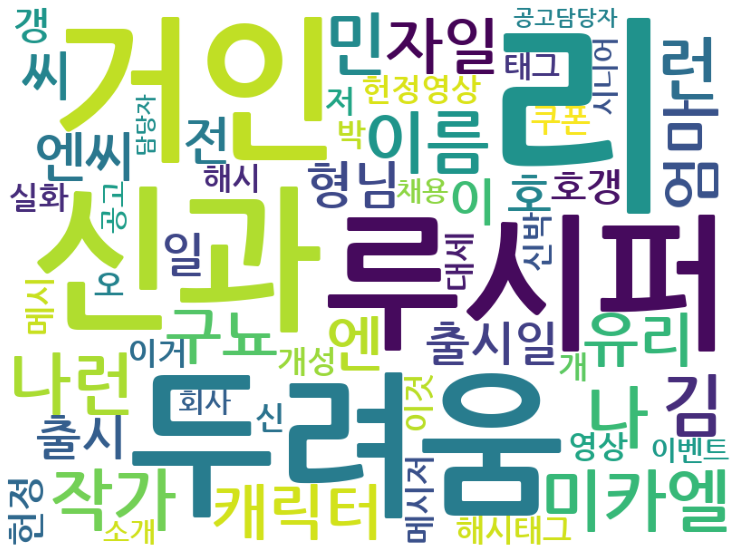

Wall time: 3.28 s


In [31]:
game = data[( data.GameName.str.find('리니지2') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

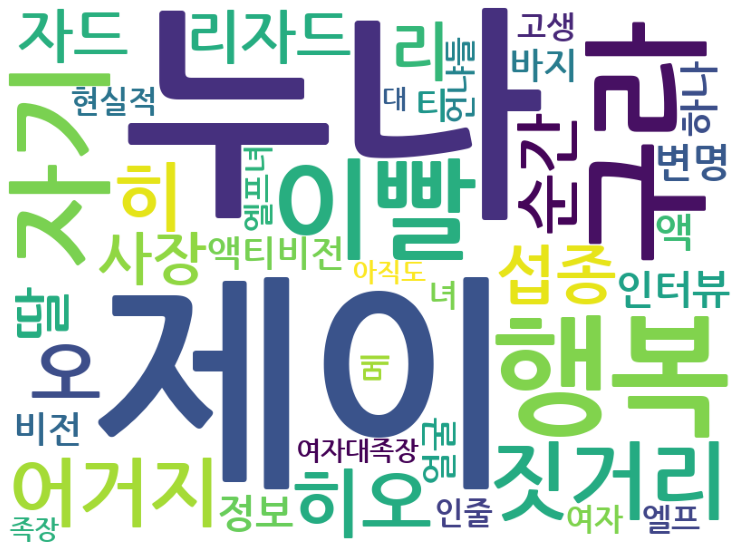

Wall time: 3.93 s


In [32]:
game = data[( data.GameName.str.find('월드 오브 워크래프트') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

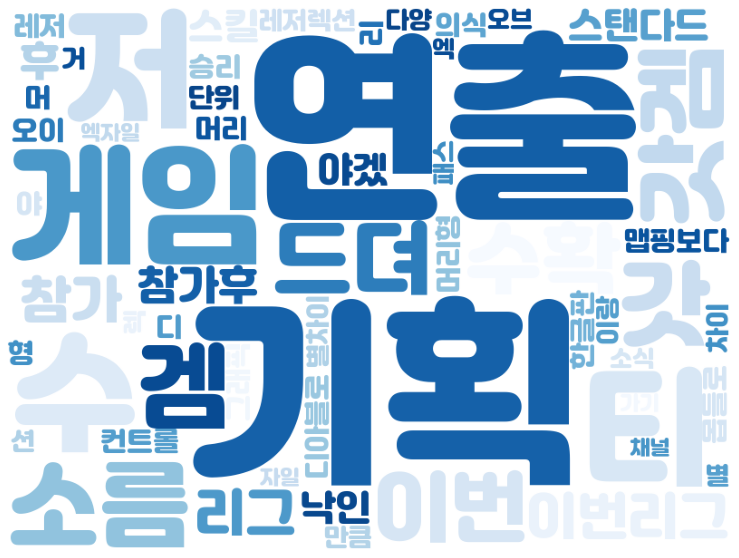

Wall time: 4.13 s


In [172]:
game = data[( data.GameName.str.find('패스 오브 엑자일') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

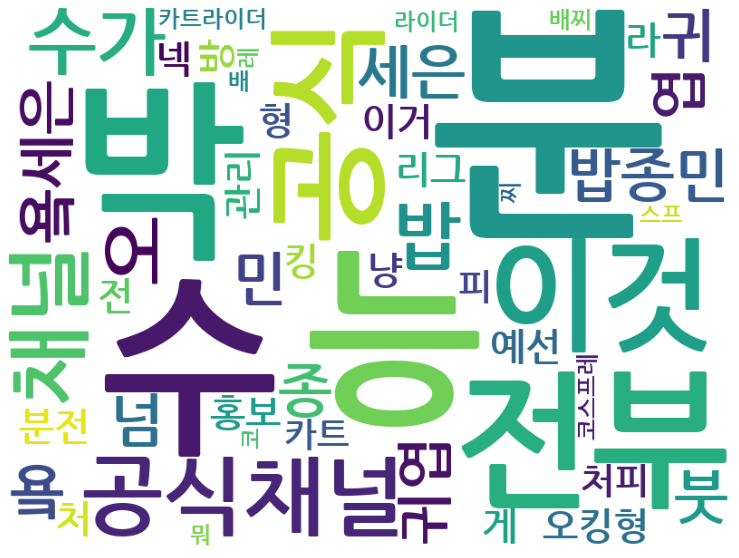

Wall time: 3.18 s


In [34]:
game = data[( data.GameName.str.find('카트라이더') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

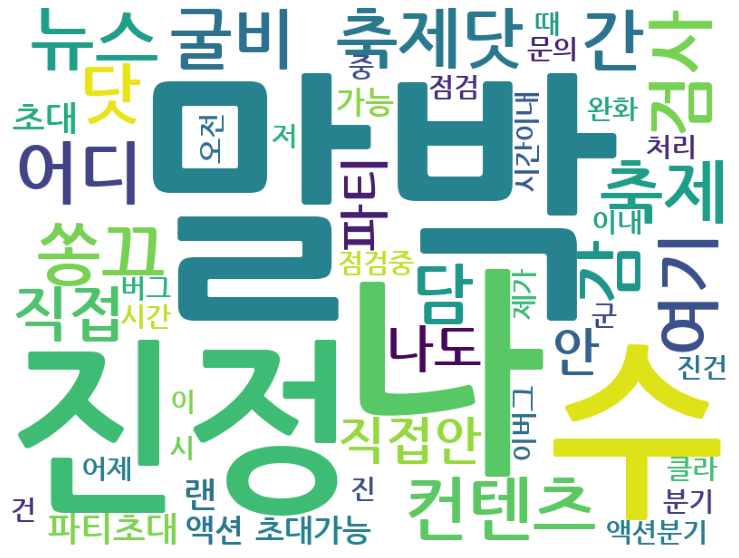

Wall time: 3.9 s


In [35]:
game = data[( data.GameName.str.find('검은사막') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# 장르 파일과 머지 

In [195]:
gametype = pd.read_csv("gametype.csv")
gametype

GameName GameType
0                        리그 오브 레전드      RTS
1                           배틀그라운드      FPS
2                           피파온라인4      스포츠
3                             오버워치      FPS
4                            로스트아크      RPG
..                             ...      ...
212         DRAGON BALL Z: KAKAROT      RPG
213  Trine 4: The Nightmare Prince       액션
214                         INSIDE       액션
215                            엘리온      RPG
216                 Cyberpunk 2077      RPG

[217 rows x 2 columns]

In [196]:
data = pd.merge(data, gametype, how = 'left', on = 'GameName')
data

GameName                                           FullText  \
0              리그 오브 레전드                    갈수록 웃기고 퀄리티도 계속 높아지네 존잼           
1              리그 오브 레전드                     얘가 솔직히 진짜 매력있는 캐릭턴데 고인           
2              리그 오브 레전드          역시 빛돌 빅 무리수 조쿠요 이런 쉰선한 바람이 에 필요하다           
3              리그 오브 레전드                            갈수록 꿀잼  퀄도 높아지고           
4              리그 오브 레전드                        역시 김정균 킨드레드템트리를 맞추네           
...                  ...                                                ...   
9878546  콜 오브 듀티: 모던 워페어          벙어리 체험 게임입니다 이 시대에 착취 되지 않을려면 의견제시는 필수입니다   
9878547  콜 오브 듀티: 모던 워페어                              말이 필요없음 재밋었 멀티에 핑만 빼고   
9878548  콜 오브 듀티: 모던 워페어                              콜옵계의 가장 명작이라면 이것이 아닐까   
9878549  콜 오브 듀티: 모던 워페어          내 인생을 바꾼 최고의 게임이다 콜 오브 듀티 시리즈 중 가장 뛰어나...   
9878550  콜 오브 듀티: 모던 워페어          전설의 시작 개발회사 인피니티와드의 비극이 시작된 지점이기도 하다 시...   

                                                      text GameType  
0                          갈수록 웃기고 퀄리티도 계속 높아지네 존잼              RTS  
1                           얘가 솔직히 진짜 매력있는 캐릭턴데 고인              RTS  
2                역시 빛돌 빅 무리수 조쿠요 이런 쉰선한 바람이 에 필요하다              RTS  
3                                  갈수록 꿀잼  퀄도 높아지고              RTS  
4                              역시 김정균 킨드레드템트리를 맞추네              RTS  
...                                                    ...      ...  
9878546          벙어리 체험 게임입니다 이 시대에 착취 되지 않을려면 의견제시는 필수입니다      FPS  
9878547                              말이 필요없음 재밋었 멀티에 핑만 빼고      FPS  
9878548                              콜옵계의 가장 명작이라면 이것이 아닐까      FPS  
9878549          내 인생을 바꾼 최고의 게임이다 콜 오브 듀티 시리즈 중 가장 뛰어나...      FPS  
9878550          전설의 시작 개발회사 인피니티와드의 비극이 시작된 지점이기도 하다 시...      FPS  

[9878551 rows x 4 columns]

In [197]:
# 장르 리스트 출력
data.groupby(['GameType']).count()

GameName  FullText     text
GameType                             
FPS        1262610   1262610  1262610
RPG        5866510   5866510  5866510
RTS         720016    720016   720016
대전격투           117       117      117
레이싱           6616      6616     6616
보드         1513552   1513552  1513552
스포츠          33583     33583    33583
아케이드           299       299      299
액션          375635    375635   375635
캐주얼          11307     11307    11307

In [198]:
data = data.dropna()

In [238]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = 'C:\\Users\\sh921\\Desktop\\Jalnan.ttf', 
        colormap = 'cividis',
                        stopwords = STOPWORDS, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

# RTS

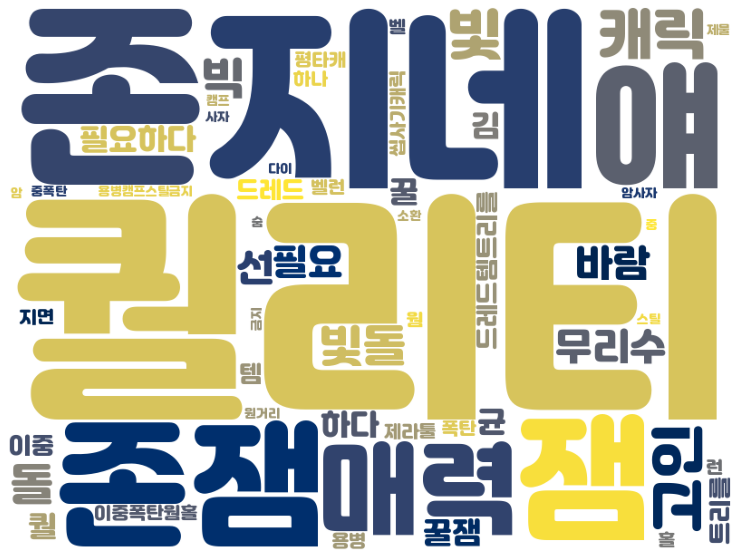

Wall time: 5.54 s


In [239]:
game = data[( data.GameType.str.find('RTS') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# FPS

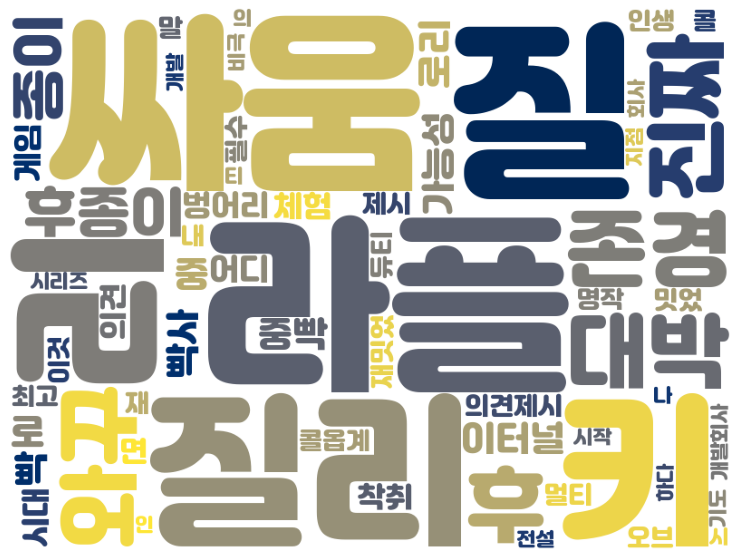

Wall time: 5.26 s


In [240]:
game = data[( data.GameType.str.find('FPS') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# 액션

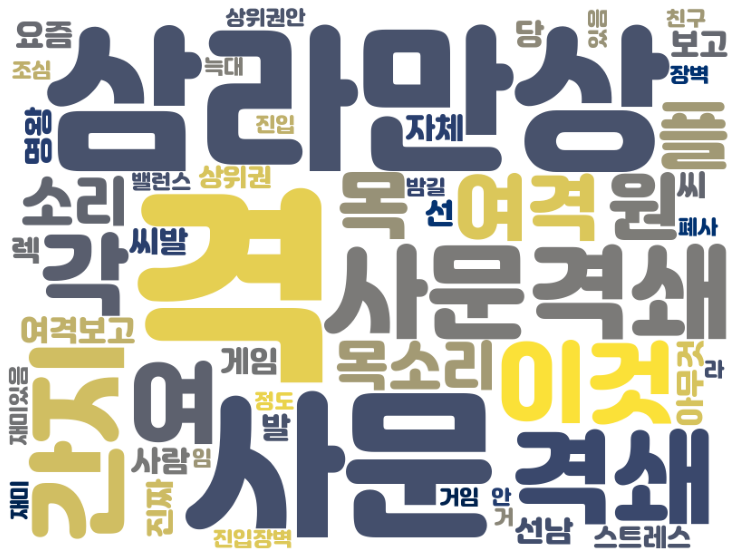

Wall time: 4.5 s


In [241]:
game = data[( data.GameType.str.find('액션') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

# RPG

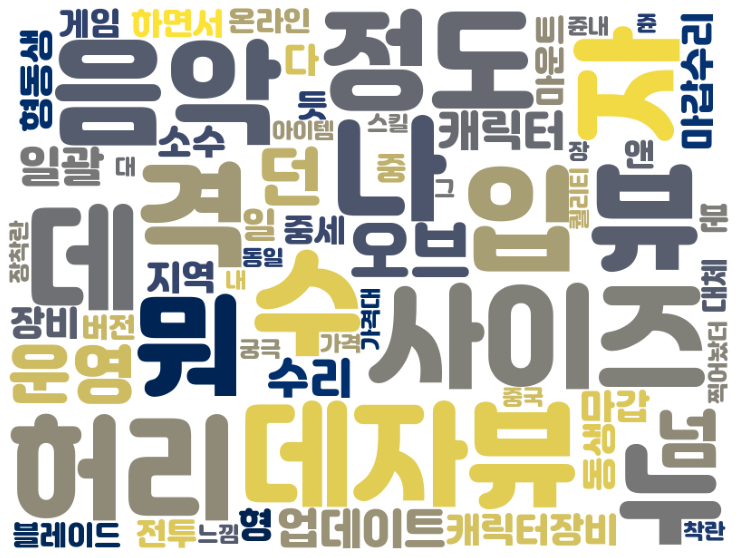

Wall time: 4.47 s


In [242]:
game = data[( data.GameType.str.find('RPG') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

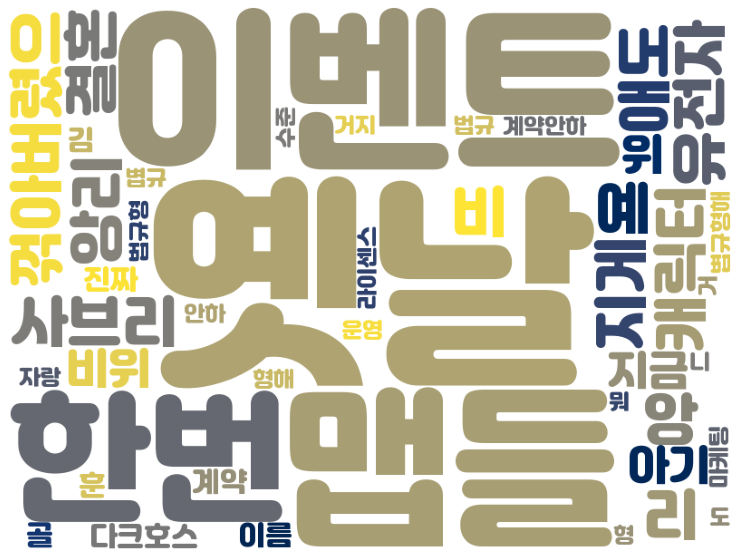

Wall time: 4.86 s


In [243]:
game = data[( data.GameType.str.find('스포츠') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

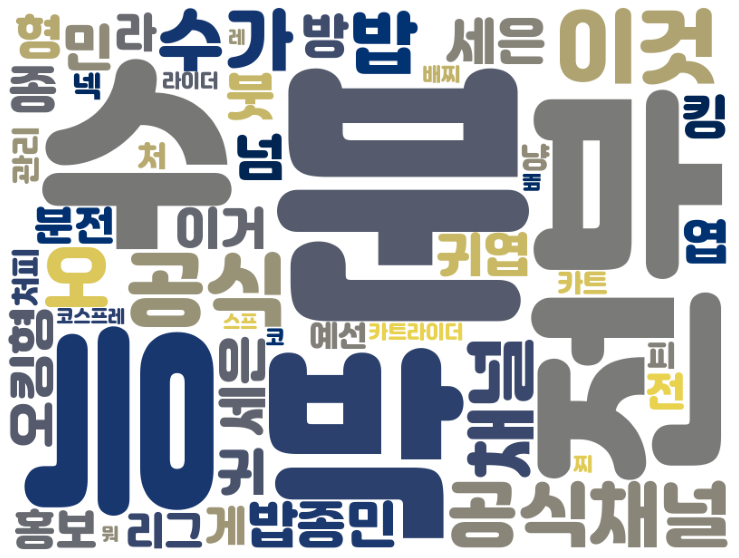

Wall time: 3.59 s


In [244]:
game = data[( data.GameType.str.find('레이싱') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

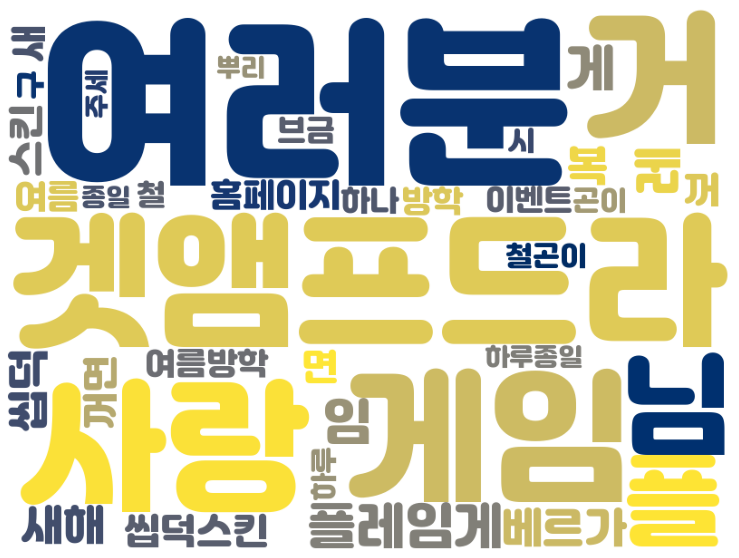

Wall time: 5.1 s


In [245]:
game = data[( data.GameType.str.find('대전격투') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

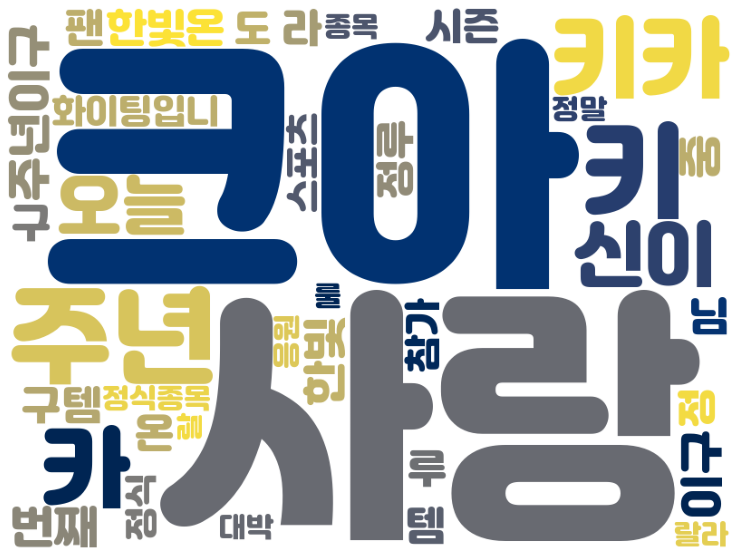

Wall time: 3.74 s


In [246]:
game = data[( data.GameType.str.find('아케이드') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

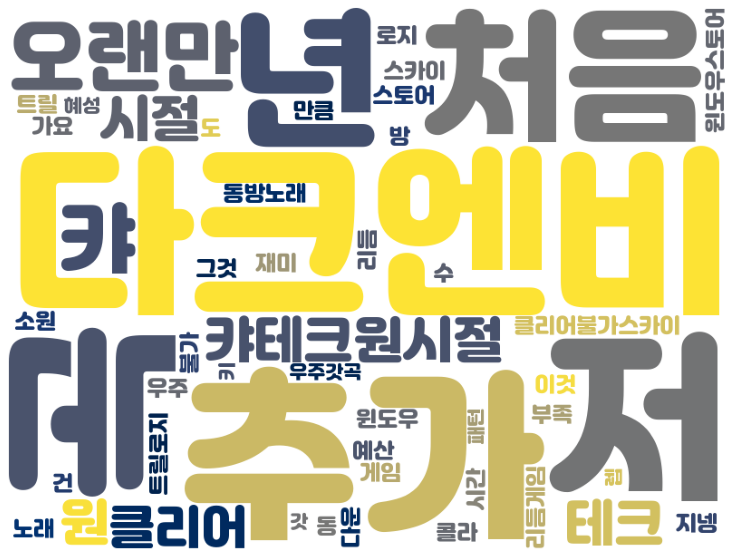

Wall time: 4.36 s


In [247]:
game = data[( data.GameType.str.find('캐주얼') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))

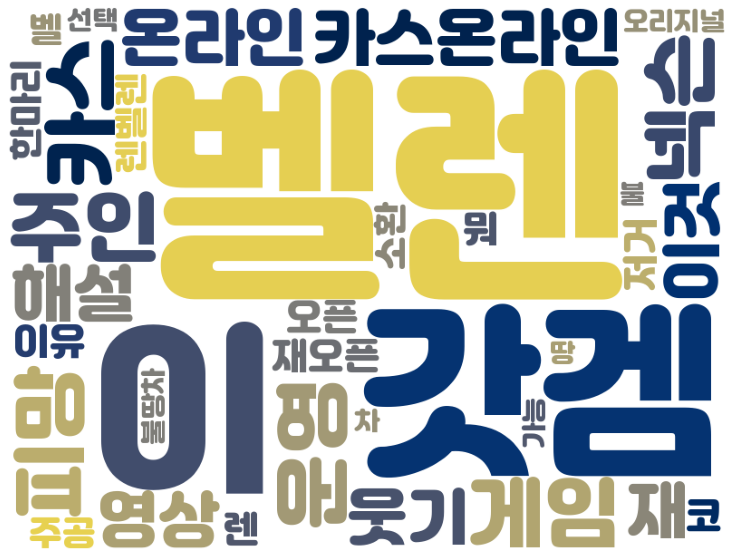

Wall time: 3.48 s


In [248]:
game = data[( data.GameType.str.find('보드') != -1 )]
game_kkma = kkma.nouns(str(game.text))
%time displayWordCloud(' '.join(game_kkma))